In [1]:
import pandas as pd
import numpy as np
from math import log2

# Create the dataset
data = {
    'age': ['31...40', '31...40', '<230', '31...40', '31...40', '<230', '<230', '<230', '31...40', '<230', '31...40', '<230'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high'],
    'student': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no']
}

# Convert data into a pandas DataFrame
df = pd.DataFrame(data)

# Function to calculate entropy
def entropy(probs):
    return -sum([p * log2(p) for p in probs if p > 0])

# Function to calculate the entropy of the target variable
def target_entropy(df, target_column):
    values, counts = np.unique(df[target_column], return_counts=True)
    probs = counts / len(df[target_column])
    return entropy(probs)

# Function to calculate information gain
def information_gain(df, feature, target_column):
    # Total entropy before split
    total_entropy = target_entropy(df, target_column)

    # Calculate the weighted entropy after split by the feature
    values, counts = np.unique(df[feature], return_counts=True)
    weighted_entropy = 0
    for i in range(len(values)):
        subset = df[df[feature] == values[i]]
        subset_entropy = target_entropy(subset, target_column)
        weighted_entropy += (counts[i] / len(df)) * subset_entropy

    # Information gain is the difference in entropy before and after the split
    return total_entropy - weighted_entropy

# Function to calculate the information gain for all features
def calculate_information_gain(df, target_column):
    features = df.columns[:-1]  # All columns except the target
    gains = {}
    for feature in features:
        gains[feature] = information_gain(df, feature, target_column)
    return gains

# Calculate the information gain for each feature
gains = calculate_information_gain(df, 'buys_computer')

# Identify the feature with the highest information gain
best_feature = max(gains, key=gains.get)

print("Information Gain for each feature:")
for feature, gain in gains.items():
    print(f"{feature}: {gain}")

print("\nThe best feature to split on is:", best_feature)


Information Gain for each feature:
age: 0.0
income: 0.4591479170272448
student: 1.0
credit_rating: 0.4591479170272448

The best feature to split on is: student


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Create the dataset
data = {
    'age': ['31...40', '31...40', '<230', '31...40', '31...40', '<230', '<230', '<230', '31...40', '<230', '31...40', '<230'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high'],
    'student': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no']
}

# Convert data into a pandas DataFrame
df = pd.DataFrame(data)

# Map target variable to binary values
df['buys_computer'] = df['buys_computer'].map({'no': 0, 'yes': 1})

# One-hot encode categorical features
df_encoded = pd.get_dummies(df.drop('buys_computer', axis=1), drop_first=True)

# Define features (X) and target (y)
X = df_encoded
y = df['buys_computer']

# Split the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Calculate training set accuracy
training_accuracy = model.score(Tr_X, Tr_y)

# Get the depth of the tree
tree_depth = model.get_depth()

# Print results
print(f"Training Set Accuracy: {training_accuracy:.2f}")
print(f"Depth of the constructed tree: {tree_depth}")


Training Set Accuracy: 1.00
Depth of the constructed tree: 1


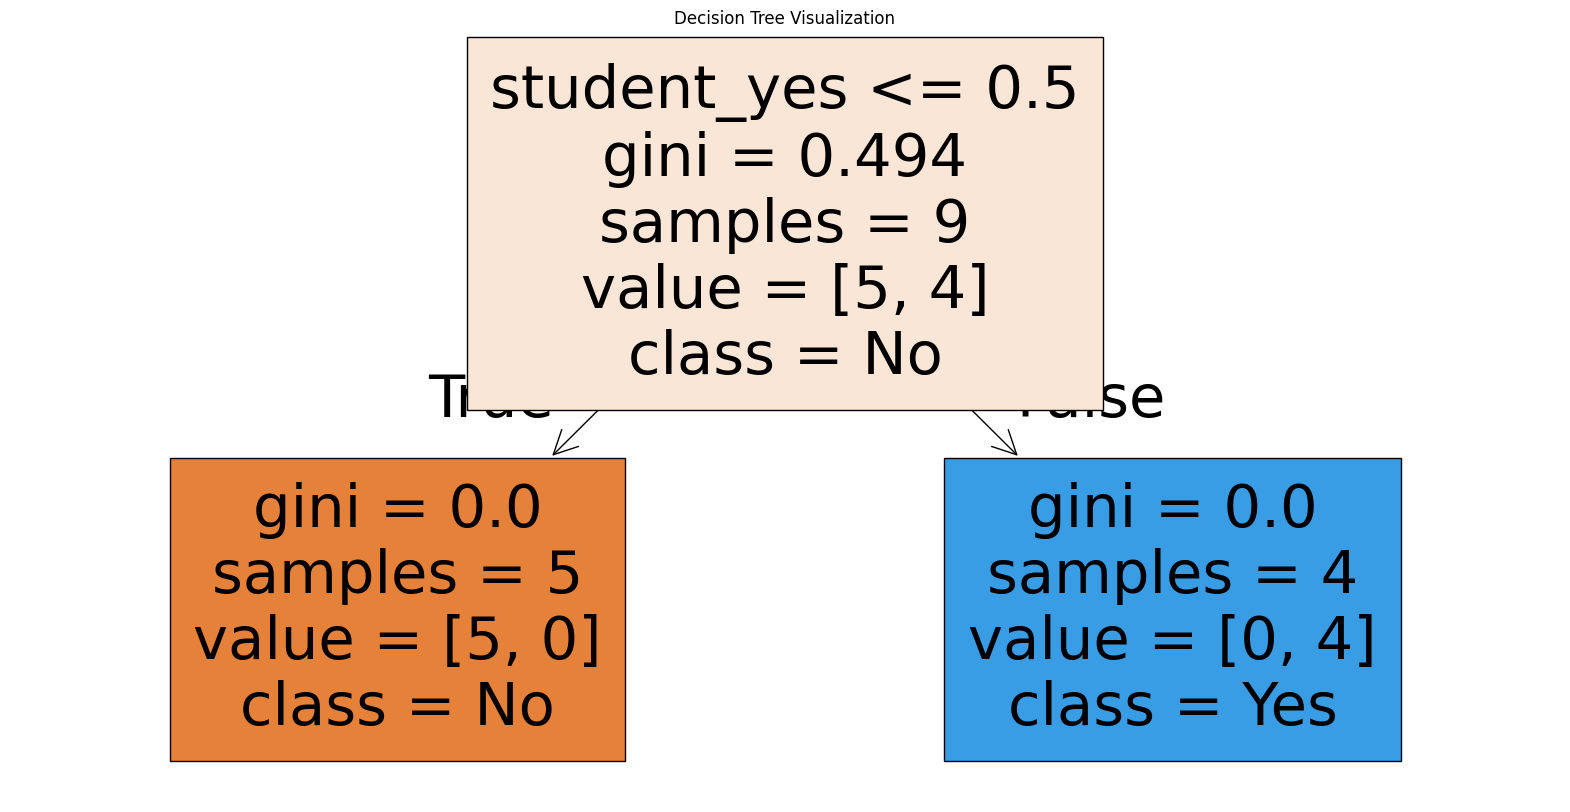

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create the dataset
data = {
    'age': ['31...40', '31...40', '<230', '31...40', '31...40', '<230', '<230', '<230', '31...40', '<230', '31...40', '<230'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high'],
    'student': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no']
}

# Convert data into a pandas DataFrame
df = pd.DataFrame(data)

# Map target variable to binary values
df['buys_computer'] = df['buys_computer'].map({'no': 0, 'yes': 1})

# One-hot encode categorical features
df_encoded = pd.get_dummies(df.drop('buys_computer', axis=1), drop_first=True)

# Define features (X) and target (y)
X = df_encoded
y = df['buys_computer']

# Split the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Visualize the constructed tree
plt.figure(figsize=(20,10))  # Adjust the figure size for better visibility
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization")
plt.show()


Training Set Accuracy: 1.00
Test Set Accuracy: 1.00


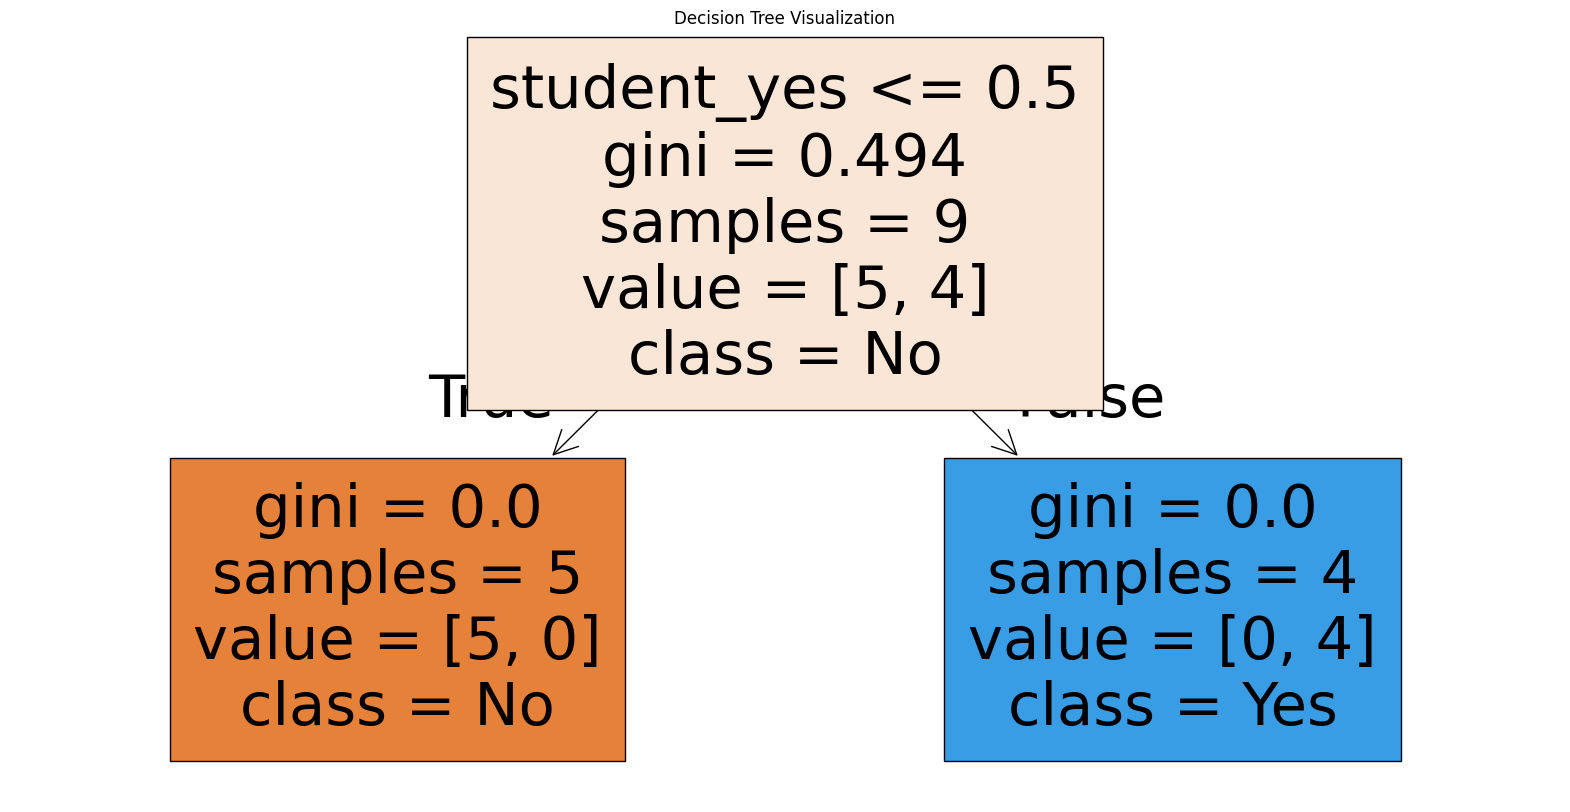

In [4]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create the dataset
data = {
    'age': ['31...40', '31...40', '<230', '31...40', '31...40', '<230', '<230', '<230', '31...40', '<230', '31...40', '<230'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high'],
    'student': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no']
}

# Convert data into a pandas DataFrame
df = pd.DataFrame(data)

# Map target variable to binary values
df['buys_computer'] = df['buys_computer'].map({'no': 0, 'yes': 1})

# One-hot encode categorical features
df_encoded = pd.get_dummies(df.drop('buys_computer', axis=1), drop_first=True)

# Define features (X) and target (y)
X = df_encoded
y = df['buys_computer']

# Split the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model
model = DecisionTreeClassifier()
model.fit(Tr_X, Tr_y)

# Calculate and print training set accuracy
training_accuracy = model.score(Tr_X, Tr_y)
print(f"Training Set Accuracy: {training_accuracy:.2f}")

# Calculate and print test set accuracy
test_accuracy = model.score(Te_X, Te_y)
print(f"Test Set Accuracy: {test_accuracy:.2f}")

# Visualize the constructed tree
plt.figure(figsize=(20, 10))  # Adjust the figure size for better visibility
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization")
plt.show()


Training Set Accuracy (max_depth=5): 1.00
Test Set Accuracy (max_depth=5): 1.00


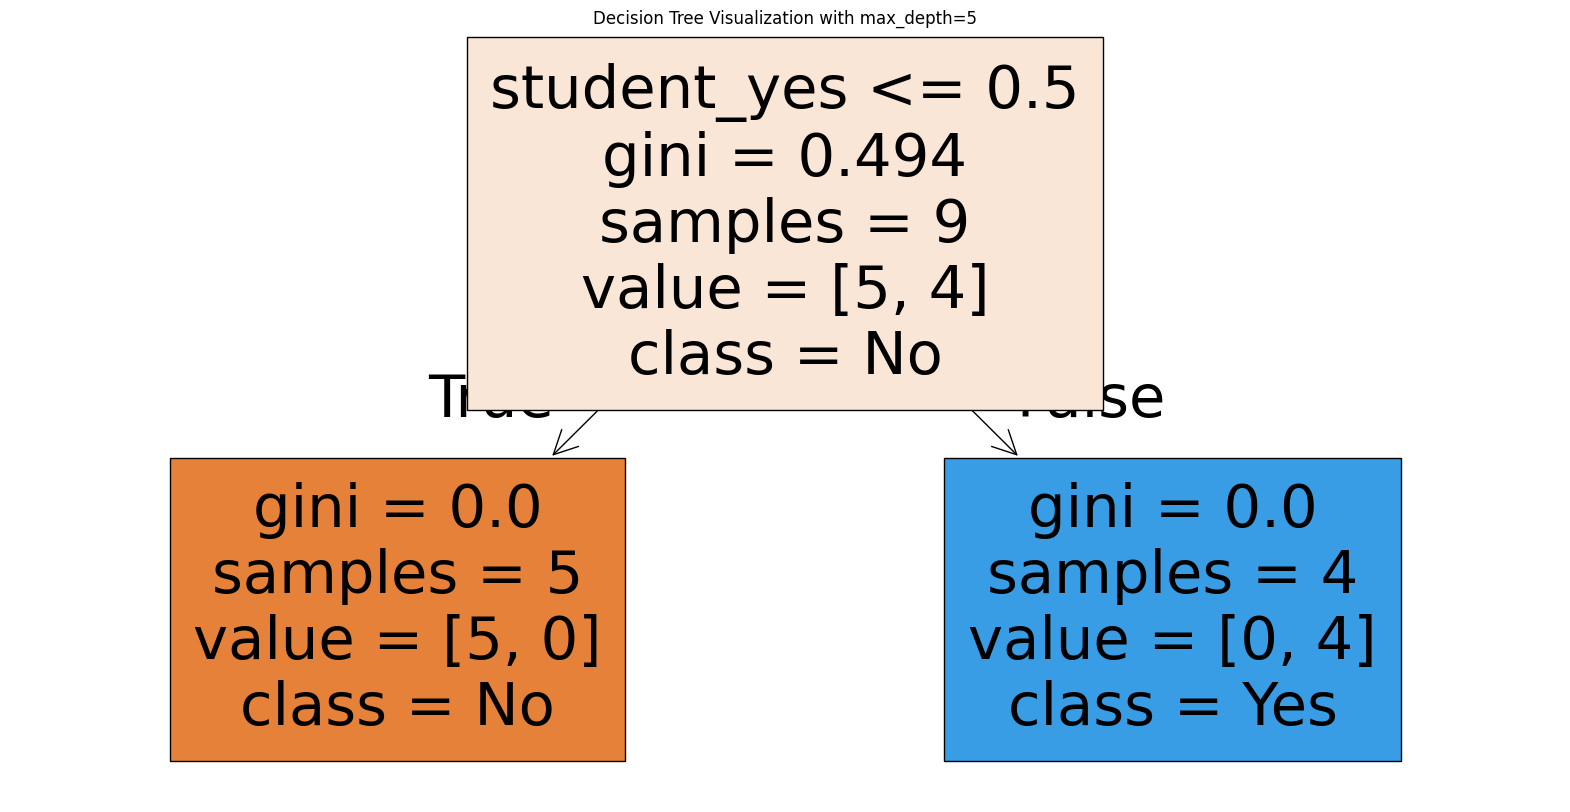

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create the dataset
data = {
    'age': ['31...40', '31...40', '<230', '31...40', '31...40', '<230', '<230', '<230', '31...40', '<230', '31...40', '<230'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high'],
    'student': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no']
}

# Convert data into a pandas DataFrame
df = pd.DataFrame(data)

# Map target variable to binary values
df['buys_computer'] = df['buys_computer'].map({'no': 0, 'yes': 1})

# One-hot encode categorical features
df_encoded = pd.get_dummies(df.drop('buys_computer', axis=1), drop_first=True)

# Define features (X) and target (y)
X = df_encoded
y = df['buys_computer']

# Split the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model with max_depth constraint
model = DecisionTreeClassifier(max_depth=5)
model.fit(Tr_X, Tr_y)

# Calculate and print training set accuracy
training_accuracy = model.score(Tr_X, Tr_y)
print(f"Training Set Accuracy (max_depth=5): {training_accuracy:.2f}")

# Calculate and print test set accuracy
test_accuracy = model.score(Te_X, Te_y)
print(f"Test Set Accuracy (max_depth=5): {test_accuracy:.2f}")

# Visualize the constructed tree with max_depth constraint
plt.figure(figsize=(20, 10))  # Adjust the figure size for better visibility
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization with max_depth=5")
plt.show()


Training Set Accuracy (Entropy, max_depth=5): 1.00
Test Set Accuracy (Entropy, max_depth=5): 1.00


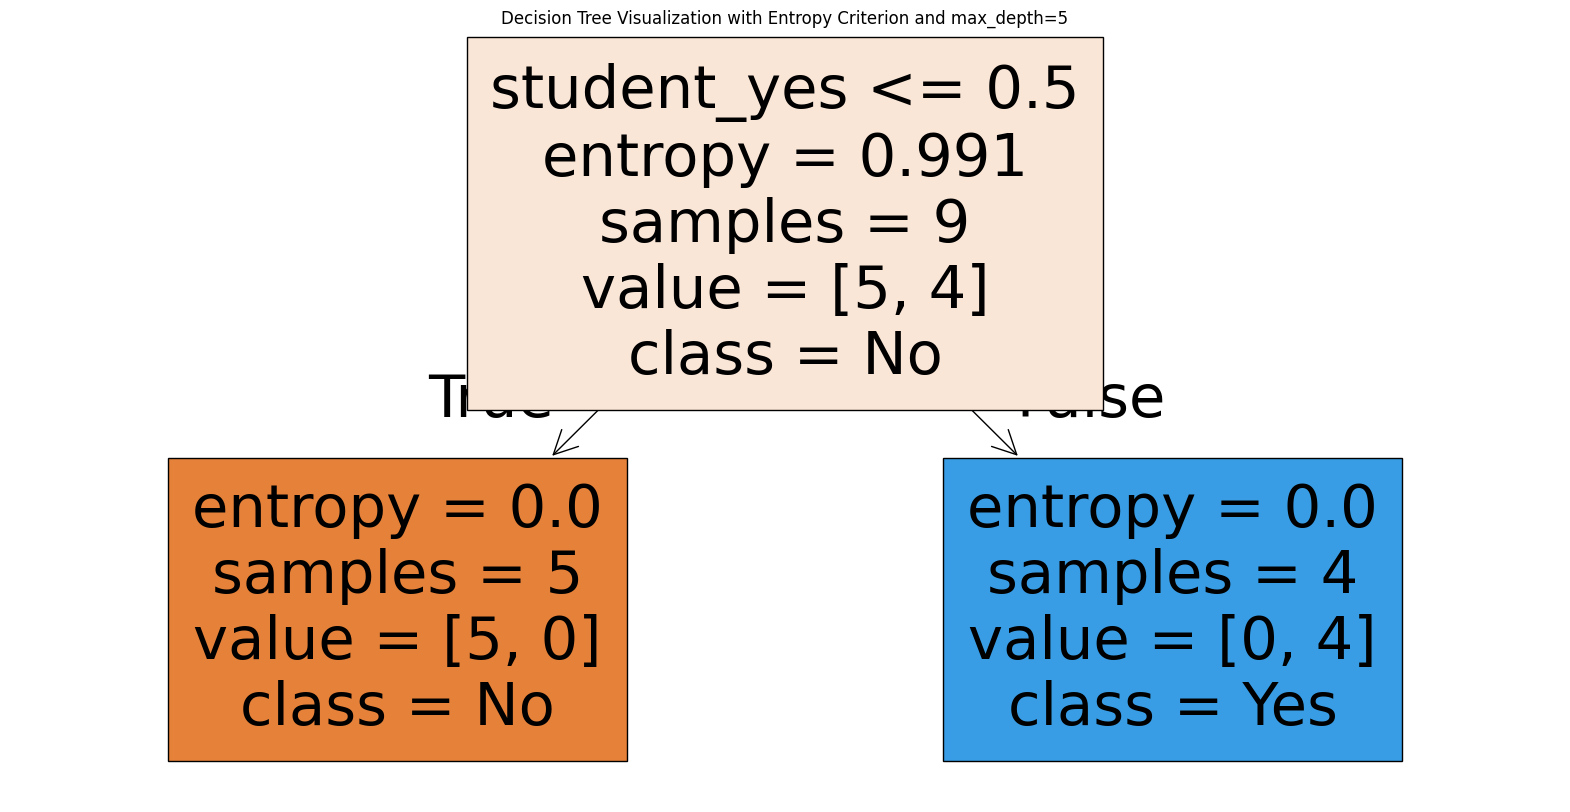

Training Set Accuracy (Gini, max_depth=5): 1.00
Test Set Accuracy (Gini, max_depth=5): 1.00


In [6]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create the dataset
data = {
    'age': ['31...40', '31...40', '<230', '31...40', '31...40', '<230', '<230', '<230', '31...40', '<230', '31...40', '<230'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'high'],
    'student': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'yes', 'no']
}

# Convert data into a pandas DataFrame
df = pd.DataFrame(data)

# Map target variable to binary values
df['buys_computer'] = df['buys_computer'].map({'no': 0, 'yes': 1})

# One-hot encode categorical features
df_encoded = pd.get_dummies(df.drop('buys_computer', axis=1), drop_first=True)

# Define features (X) and target (y)
X = df_encoded
y = df['buys_computer']

# Split the dataset into training and testing sets
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree model with entropy criterion
model_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=5)
model_entropy.fit(Tr_X, Tr_y)

# Calculate and print training set accuracy
training_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)
print(f"Training Set Accuracy (Entropy, max_depth=5): {training_accuracy_entropy:.2f}")

# Calculate and print test set accuracy
test_accuracy_entropy = model_entropy.score(Te_X, Te_y)
print(f"Test Set Accuracy (Entropy, max_depth=5): {test_accuracy_entropy:.2f}")

# Visualize the constructed tree with entropy criterion
plt.figure(figsize=(20, 10))  # Adjust the figure size for better visibility
plot_tree(model_entropy, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.title("Decision Tree Visualization with Entropy Criterion and max_depth=5")
plt.show()

# To compare with the default criterion (Gini)
model_gini = DecisionTreeClassifier(criterion="gini", max_depth=5)
model_gini.fit(Tr_X, Tr_y)

# Calculate and print training set accuracy for Gini
training_accuracy_gini = model_gini.score(Tr_X, Tr_y)
print(f"Training Set Accuracy (Gini, max_depth=5): {training_accuracy_gini:.2f}")

# Calculate and print test set accuracy for Gini
test_accuracy_gini = model_gini.score(Te_X, Te_y)
print(f"Test Set Accuracy (Gini, max_depth=5): {test_accuracy_gini:.2f}")
